# COICOP Category Comparison

In [1]:
import pandas as pd
import re
import csv
import matplotlib.pyplot as plt

Import Spacy:

In [2]:
import spacy

To install the model:

    python -m spacy download en_vectors_web_lg


## Load COICOP Categories
In the CSV there is already a selection of categories, removing the non-related ones

In [3]:
coicop = pd.read_csv('coicop-select.csv')

In [4]:
coicop.head(5)

,Level,Code,Description
0,1,CP01,Food and non-alcoholic beverages
1,2,CP011,Food
2,3,CP0111,Bread and cereals
3,4,CP01111,Rice
4,5,CP01111A,Long-grain rice (1 kg)


Select only Level 4 and Level 5 classifications

In [5]:
coicop45 = coicop.loc[(coicop["Level"] == 5) | (coicop["Level"] == 4)]

In [6]:
coicop4 = coicop.loc[(coicop["Level"] == 4)]

In [7]:
len(coicop4)

132

In [8]:
len(coicop45)

256

In [9]:
coicop45.head(5)

,Level,Code,Description
3,4,CP01111,Rice
4,5,CP01111A,Long-grain rice (1 kg)
5,4,CP01112,Flours and other cereals
6,5,CP01112A,Wheat flour (1 kg)
7,5,CP01112B,Cornflakes (1 kg)


In [10]:
coicop4.head(5)

,Level,Code,Description
3,4,CP01111,Rice
5,4,CP01112,Flours and other cereals
8,4,CP01113,Bread
10,4,CP01114,Other bakery products
11,4,CP01115,Pizza and quiche


## Load Data Sample

In [11]:
df1 = pd.read_csv('csv/output-0000.csv', 
                 names=['product','price','unit','category','city','store','date'])

In [12]:
df2 = pd.read_csv('csv/output-0001.csv', 
                 names=['product','price','unit','category','city','store','date'])

In [13]:
df3 = pd.read_csv('csv/output-0002.csv', 
                 names=['product','price','unit','category','city','store','date'])

In [14]:
df4 = pd.read_csv('csv/output-0003.csv', 
                 names=['product','price','unit','category','city','store','date'])

In [15]:
df5 = pd.read_csv('csv/output-0004.csv', 
                 names=['product','price','unit','category','city','store','date'])

In [16]:
df6 = pd.read_csv('csv/output-0005.csv', 
                 names=['product','price','unit','category','city','store','date'])

In [17]:
df7 = pd.read_csv('csv/output-0006.csv', 
                 names=['product','price','unit','category','city','store','date'])

In [18]:
df8 = pd.read_csv('csv/output-0007.csv', 
                 names=['product','price','unit','category','city','store','date'])

In [19]:
df9 = pd.read_csv('csv/output-0008.csv', 
                 names=['product','price','unit','category','city','store','date'])

In [20]:
df10 = pd.read_csv('csv/output-0009.csv', 
                 names=['product','price','unit','category','city','store','date'])

In [21]:
df11 = pd.read_csv('csv/output-0010.csv',
                   names=['product','price','unit','category','city','store','date'])

In [22]:
df12 = pd.read_csv('csv/output-0011.csv',
                   names=['product','price','unit','category','city','store','date'])

In [23]:
df13 = pd.read_csv('csv/output-0012.csv',
                   names=['product','price','unit','category','city','store','date'])

In [24]:
df14 = pd.read_csv('csv/output-0013.csv',
                   names=['product','price','unit','category','city','store','date'])

In [25]:
df15 = pd.read_csv('csv/output-0014.csv',
                   names=['product','price','unit','category','city','store','date'])

In [26]:
df16 = pd.read_csv('csv/output-0015.csv',
                   names=['product','price','unit','category','city','store','date'])

In [27]:
df17 = pd.read_csv('csv/output-0016.csv',
                   names=['product','price','unit','category','city','store','date'])

In [28]:
df18 = pd.read_csv('csv/output-0017.csv',
                   names=['product','price','unit','category','city','store','date'])

In [29]:
df19 = pd.read_csv('csv/output-0018.csv',
                   names=['product','price','unit','category','city','store','date'])

In [30]:
temp = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19]

In [31]:
df = pd.concat(temp)

In [32]:
df.head()

,product,price,unit,category,city,store,date
0,Debi Lilly Hydrangea 3 Stem - colors may varyrrn,$8.99,($8.99/each),Flowers,LA,Vons,2017-01-10 02:00:24
1,California Grown Deluxe Bouquet - colors may vary,$14.59,($14.59/each),Flowers,LA,Vons,2017-01-10 02:00:24
2,Alstroemeria 9 Stem - colors may vary,$6.79,($6.79/each),Flowers,LA,Vons,2017-01-10 02:00:24
3,1.50 LB Cinnamon Sugar Tortilla Chips,$5.99,($3.99/lb),Flowers,LA,Vons,2017-01-10 02:00:24
4,Lily Stargazer 3 Stem - colors may vary,$8.99,($8.99/each),Flowers,LA,Vons,2017-01-10 02:00:24


## Data organization

Break the name in two columns to separate SKU size/counting. Starting from the right to avoid " - " in the product name.

In [33]:
new = df["product"].str.rsplit(" - ", n = 1, expand = True)

In [34]:
df["item"] = new[0]

In [35]:
df["size"] = new[1]

In [36]:
df.drop(columns =["product"], inplace = True) 

In [37]:
df.head()

,price,unit,category,city,store,date,item,size
0,$8.99,($8.99/each),Flowers,LA,Vons,2017-01-10 02:00:24,Debi Lilly Hydrangea 3 Stem,colors may varyrrn
1,$14.59,($14.59/each),Flowers,LA,Vons,2017-01-10 02:00:24,California Grown Deluxe Bouquet,colors may vary
2,$6.79,($6.79/each),Flowers,LA,Vons,2017-01-10 02:00:24,Alstroemeria 9 Stem,colors may vary
3,$5.99,($3.99/lb),Flowers,LA,Vons,2017-01-10 02:00:24,1.50 LB Cinnamon Sugar Tortilla Chips,None
4,$8.99,($8.99/each),Flowers,LA,Vons,2017-01-10 02:00:24,Lily Stargazer 3 Stem,colors may vary


Rearrange the date to keep only the day

In [38]:
df["date"] = pd.to_datetime(df["date"]).dt.date
df.head()

,price,unit,category,city,store,date,item,size
0,$8.99,($8.99/each),Flowers,LA,Vons,2017-01-10,Debi Lilly Hydrangea 3 Stem,colors may varyrrn
1,$14.59,($14.59/each),Flowers,LA,Vons,2017-01-10,California Grown Deluxe Bouquet,colors may vary
2,$6.79,($6.79/each),Flowers,LA,Vons,2017-01-10,Alstroemeria 9 Stem,colors may vary
3,$5.99,($3.99/lb),Flowers,LA,Vons,2017-01-10,1.50 LB Cinnamon Sugar Tortilla Chips,None
4,$8.99,($8.99/each),Flowers,LA,Vons,2017-01-10,Lily Stargazer 3 Stem,colors may vary


In [39]:
df.isna().sum()

price            0
unit        140154
category         0
city             0
store            0
date             0
item             0
size        384460
dtype: int64

Details about the data:

In [40]:
print("Cities: " + str(df["city"].unique()) + " - Number of different cities: " + str(len(df["city"].unique())))

Cities: ['LA' 'Seattle' 'Portland' 'Honolulu' 'SF' 'DC' 'Orlando' 'Phoenix'
 'Austin' 'LV' 'Houston' 'Boise'] - Number of different cities: 12


In [41]:
print("Stores: " + str(df["store"].unique()) + " - Number of different stores: " + str(len(df["store"].unique())))

Stores: ['Vons' 'Safeway' 'HEB' 'Randalls' 'Albertsons'] - Number of different stores: 5


In [42]:
print("Dates: " + str(df["date"].unique()) + " - Number of different dates: " + str(len(df["date"].unique())))

Dates: [datetime.date(2017, 1, 10) datetime.date(2017, 1, 11)
 datetime.date(2017, 1, 12)] - Number of different dates: 3


In [43]:
df.shape

(1035535, 8)

## Create the list of product categories, product names, and COICOP categories for matching

In [44]:
products = list(df.item.unique())
categories = list(df.category.unique())
coicop_categories = list(coicop45.Description.unique())

Clean categories text:
- remove hypens (-) from categories
- remove text between parenthesis in Coicop Categories

In [45]:
categories = [re.sub(r'-', ' ', cat) for cat in categories]

In [46]:
categories[0:10]

['Flowers',
 'Toddler Foods',
 'Whiskey',
 'Cigarettes',
 'Other Animal Care',
 'Zinc',
 'Trash Bags  Outside',
 'Hot Dogs Franks',
 'Southern Foods',
 'Rice']

In [47]:
coicop_categories = [re.sub(r'\([^)]*\)', '', cat) for cat in coicop_categories]

In [48]:
coicop_categories[0:10]

['Rice',
 'Long-grain rice ',
 'Flours and other cereals',
 'Wheat flour ',
 'Cornflakes ',
 'Bread',
 'White bread, loaf ',
 'Other bakery products',
 'Pizza and quiche',
 'Pizza, frozen ']

In [49]:
products[0:10]

['Debi Lilly Hydrangea 3 Stem',
 'California Grown Deluxe Bouquet',
 'Alstroemeria 9 Stem',
 '1.50 LB Cinnamon Sugar Tortilla Chips',
 'Lily Stargazer 3 Stem',
 'Mini Carnations 1 Bunch',
 'Poms 9 Stem',
 'Rosemary Cone',
 'Roses Pink',
 'Roses Rainbow']

In [50]:
len(products)

158786

In [51]:
len(categories)

1713

In [52]:
len(coicop_categories)

256

## Compare categories with Spacy

In [ ]:
nlp = spacy.load("en_vectors_web_lg")

In [ ]:
category_tok = [nlp(cat) for cat in categories]

In [ ]:
coicop_tok = [nlp(cat) for cat in coicop_categories]

In [ ]:
with open('cat_matching_spacy.csv','w') as f1:
    writer=csv.writer(f1, delimiter=',',lineterminator='\n',)
    for c in category_tok:
        best = ('','',0)
        try:
            for c_ in coicop_tok:
                try:
                    score = c.similarity(c_)
                    if score > best[2]:
                        best = (c,c_,score)
                except:
                    continue
            writer.writerow(best)
        except:
            continue

In [53]:
spacy_results = pd.read_csv("cat_matching_spacy.csv", names=["Category", "Coicop Cat", "Conf Cat"])

In [54]:
spacy_results.head(15)

,Category,Coicop Cat,Conf Cat
0,Flowers,Plants and flowers,0.861174
1,Toddler Foods,Baby food,0.830930
2,Whiskey,Vodka,0.731175
3,Cigarettes,Cigarettes,1.000000
4,Other Animal Care,Other medical products n.e.c.,0.789607
5,Zinc,Mineral salt,0.599264
6,Trash Bags Outside,Dog food dry,0.592026
7,Hot Dogs Franks,"Dog food, meat",0.692350
8,Southern Foods,"Baby food, meat base",0.689568
9,Rice,Rice,1.000000


In [55]:
spacy_results.isna().sum()

Category      4
Coicop Cat    4
Conf Cat      0
dtype: int64

In [56]:
spacy_results["Conf Cat"][spacy_results["Conf Cat"] < 0.7].count()

871

In [57]:
spacy_results.shape

(1713, 3)

In [58]:
spacy_results["Conf Cat"].mean()

0.6864887268593091

(array([  4.,   3.,  10.,  29., 136., 288., 401., 437., 316.,  89.]),
 array([0.        , 0.10000001, 0.20000002, 0.30000003, 0.40000004,
        0.50000005, 0.60000007, 0.70000008, 0.80000009, 0.9000001 ,
        1.00000011]),
 <BarContainer object of 10 artists>)

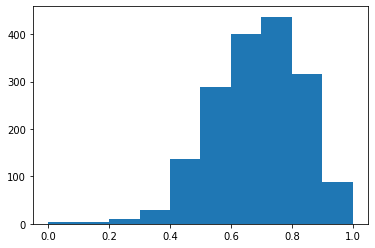

In [59]:
plt.hist(spacy_results["Conf Cat"])

In [60]:
spacy_results["Conf Cat"].std()/spacy_results["Conf Cat"].mean()

0.21647284805085149

## Compare categories and product names with Spacy

In [ ]:
product_tok = [nlp(cat) for cat in products]

In [ ]:
with open('prod_matching_spacy.csv','w') as f1:
    writer=csv.writer(f1, delimiter=',',lineterminator='\n',)
    for c in product_tok:
        best = ('','',0)
        try:
            for c_ in coicop_tok:
                try:
                    score = c.similarity(c_)
                    if score > best[2]:
                        best = (c,c_,score)
                except:
                    continue
            writer.writerow(best)
        except:
            continue

In [61]:
spacy_results_prod = pd.read_csv("prod_matching_spacy.csv", names=["Product", "Coicop Prod", "Conf Prod"])

In [62]:
spacy_results_prod.head(15)

,Product,Coicop Prod,Conf Prod
0,Debi Lilly Hydrangea 3 Stem,Leaf and stem vegetables,0.533939
1,California Grown Deluxe Bouquet,Vegetable grown for their fruit,0.610329
2,Alstroemeria 9 Stem,Leaf and stem vegetables,0.506795
3,1.50 LB Cinnamon Sugar Tortilla Chips,Butter,0.764394
4,Lily Stargazer 3 Stem,Leaf and stem vegetables,0.608580
5,Mini Carnations 1 Bunch,"Potato crisps, single pack",0.599649
6,Poms 9 Stem,Leaf and stem vegetables,0.578002
7,Rosemary Cone,Leaf and stem vegetables,0.600605
8,Roses Pink,Plants and flowers,0.679916
9,Roses Rainbow,Plants and flowers,0.660013


In [63]:
spacy_results_prod.isna().sum()

Product        40
Coicop Prod    40
Conf Prod       0
dtype: int64

In [64]:
spacy_results_prod["Conf Prod"][spacy_results_prod["Conf Prod"] < 0.7].count()

78144

In [65]:
spacy_results_prod.shape

(158786, 3)

In [66]:
spacy_results_prod["Conf Prod"].mean()

0.6934664819082652

(array([4.2000e+01, 7.3000e+01, 3.6200e+02, 1.1270e+03, 4.0290e+03,
        1.7079e+04, 5.5432e+04, 6.2015e+04, 1.8228e+04, 3.9900e+02]),
 array([0.        , 0.10000001, 0.20000002, 0.30000003, 0.40000004,
        0.50000005, 0.60000007, 0.70000008, 0.80000009, 0.9000001 ,
        1.00000011]),
 <BarContainer object of 10 artists>)

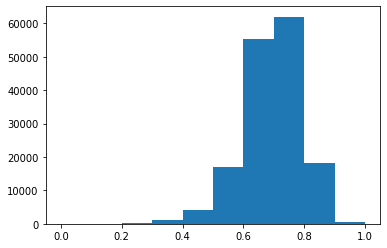

In [67]:
plt.hist(spacy_results_prod["Conf Prod"])

In [68]:
spacy_results_prod["Conf Prod"].std()/spacy_results_prod["Conf Prod"].mean()

0.1389986854767692

## Combine product and category matching

Align category and item name to cleaning made for NLP processing

In [69]:
df["cat_clean"] = [re.sub(r'-', ' ', cat) for cat in df["category"]]

In [70]:
results = df.merge(spacy_results, how = "left", left_on = "cat_clean", right_on = "Category").merge(spacy_results_prod, how = "left", left_on = "item", right_on = "Product")
results.drop(columns=["Category", "Product"], inplace=True)

In [71]:
results.isna().sum()

price               0
unit           140154
category            0
city                0
store               0
date                0
item                0
size           384460
cat_clean           0
Coicop Cat        870
Conf Cat          870
Coicop Prod       254
Conf Prod         254
dtype: int64

In [72]:
results.shape

(1035535, 13)

In [73]:
df.shape

(1035535, 9)

In [74]:
results

,price,unit,category,city,store,date,item,size,cat_clean,Coicop Cat,Conf Cat,Coicop Prod,Conf Prod
0,$8.99,($8.99/each),Flowers,LA,Vons,2017-01-10,Debi Lilly Hydrangea 3 Stem,colors may varyrrn,Flowers,Plants and flowers,0.861174,Leaf and stem vegetables,0.533939
1,$14.59,($14.59/each),Flowers,LA,Vons,2017-01-10,California Grown Deluxe Bouquet,colors may vary,Flowers,Plants and flowers,0.861174,Vegetable grown for their fruit,0.610329
2,$6.79,($6.79/each),Flowers,LA,Vons,2017-01-10,Alstroemeria 9 Stem,colors may vary,Flowers,Plants and flowers,0.861174,Leaf and stem vegetables,0.506795
3,$5.99,($3.99/lb),Flowers,LA,Vons,2017-01-10,1.50 LB Cinnamon Sugar Tortilla Chips,None,Flowers,Plants and flowers,0.861174,Butter,0.764394
4,$8.99,($8.99/each),Flowers,LA,Vons,2017-01-10,Lily Stargazer 3 Stem,colors may vary,Flowers,Plants and flowers,0.861174,Leaf and stem vegetables,0.608580
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035530,$10.00,NaN,bar-soap,Austin,HEB,2017-01-12,"Pre de Provence Zodiaque Soap In Tin, Libra, EACH",None,bar soap,"Toilet soap, liquid",0.734161,"Toilet soap, liquid",0.668438
1035531,$5.90,($0.63 / OZ),bar-soap,Austin,HEB,2017-01-12,Clean Well Foaming All-Natural Antibacterial L...,None,bar soap,"Toilet soap, liquid",0.734161,"Detergent for washing machine, powder, 70-90 g...",0.751411
1035532,$4.40,($1.36 / OZ),bar-soap,Austin,HEB,2017-01-12,"Grandpa's Patchouli Soap with Aloe Vera, 3.25 OZ",None,bar soap,"Toilet soap, liquid",0.734161,"Toilet soap, liquid",0.670858
1035533,$5.76,($0.96 / OZ),bar-soap,Austin,HEB,2017-01-12,"Grandma's After Workout Sports Bar Soap, Spear...",None,bar soap,"Toilet soap, liquid",0.734161,"Milk, fresh, unskimmed",0.740894


## Only Categories matching

In [75]:
results_cat = df.merge(spacy_results, how="left", left_on = "cat_clean", right_on = "Category")
results_cat.drop(columns=["Category"], inplace=True)

In [76]:
results_cat.shape

(1035535, 11)

In [77]:
df.shape

(1035535, 9)

In [78]:
results_cat.isna().sum()

price              0
unit          140154
category           0
city               0
store              0
date               0
item               0
size          384460
cat_clean          0
Coicop Cat       870
Conf Cat         870
dtype: int64

In [79]:
len(df["category"].unique())

1713

In [80]:
len(spacy_results["Category"].unique())

1710

In [81]:
spacy_results[spacy_results["Category"].isna()]

,Category,Coicop Cat,Conf Cat
1149,NaN,NaN,0.0
1196,NaN,NaN,0.0
1332,NaN,NaN,0.0
1470,NaN,NaN,0.0


In [82]:
categories[1149]

'mouthrinse'

In [83]:
categories[1196]

'barette'

In [84]:
categories[1332]

'serveware'

In [85]:
categories[1470]

'offals'

In [86]:
len(df[df["category"] == "serveware"])

658

In [87]:
results_cat

,price,unit,category,city,store,date,item,size,cat_clean,Coicop Cat,Conf Cat
0,$8.99,($8.99/each),Flowers,LA,Vons,2017-01-10,Debi Lilly Hydrangea 3 Stem,colors may varyrrn,Flowers,Plants and flowers,0.861174
1,$14.59,($14.59/each),Flowers,LA,Vons,2017-01-10,California Grown Deluxe Bouquet,colors may vary,Flowers,Plants and flowers,0.861174
2,$6.79,($6.79/each),Flowers,LA,Vons,2017-01-10,Alstroemeria 9 Stem,colors may vary,Flowers,Plants and flowers,0.861174
3,$5.99,($3.99/lb),Flowers,LA,Vons,2017-01-10,1.50 LB Cinnamon Sugar Tortilla Chips,None,Flowers,Plants and flowers,0.861174
4,$8.99,($8.99/each),Flowers,LA,Vons,2017-01-10,Lily Stargazer 3 Stem,colors may vary,Flowers,Plants and flowers,0.861174
...,...,...,...,...,...,...,...,...,...,...,...
1035530,$10.00,NaN,bar-soap,Austin,HEB,2017-01-12,"Pre de Provence Zodiaque Soap In Tin, Libra, EACH",None,bar soap,"Toilet soap, liquid",0.734161
1035531,$5.90,($0.63 / OZ),bar-soap,Austin,HEB,2017-01-12,Clean Well Foaming All-Natural Antibacterial L...,None,bar soap,"Toilet soap, liquid",0.734161
1035532,$4.40,($1.36 / OZ),bar-soap,Austin,HEB,2017-01-12,"Grandpa's Patchouli Soap with Aloe Vera, 3.25 OZ",None,bar soap,"Toilet soap, liquid",0.734161
1035533,$5.76,($0.96 / OZ),bar-soap,Austin,HEB,2017-01-12,"Grandma's After Workout Sports Bar Soap, Spear...",None,bar soap,"Toilet soap, liquid",0.734161


## Remove dollar sign and other characters from prices

In [88]:
prices = [re.sub('[a-z]*\s*\$*\/*,*', '', item) for item in results_cat.price]

In [89]:
results_cat.price = prices

In [90]:
prices = [re.sub('[a-z]*\s*\$*\/*,*', '', item) for item in results.price]

In [91]:
results.price = prices

## Use COICOP level 4 categories in all data

In [92]:
coicop4["cat"] = [re.sub(r'\([^)]*\)', '', cat) for cat in coicop4["Description"]]

/home/luigi/Documents/venv/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [93]:
coicop4.isna().sum()

Level          0
Code           0
Description    0
cat            0
dtype: int64

In [94]:
coicop4.head()

,Level,Code,Description,cat
3,4,CP01111,Rice,Rice
5,4,CP01112,Flours and other cereals,Flours and other cereals
8,4,CP01113,Bread,Bread
10,4,CP01114,Other bakery products,Other bakery products
11,4,CP01115,Pizza and quiche,Pizza and quiche


In [95]:
coicop45["cat"] = [re.sub(r'\([^)]*\)', '', cat) for cat in coicop45["Description"]]

/home/luigi/Documents/venv/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [96]:
coicop45.isna().sum()

Level          0
Code           0
Description    0
cat            0
dtype: int64

In [97]:
coicop45.head(5)

,Level,Code,Description,cat
3,4,CP01111,Rice,Rice
4,5,CP01111A,Long-grain rice (1 kg),Long-grain rice
5,4,CP01112,Flours and other cereals,Flours and other cereals
6,5,CP01112A,Wheat flour (1 kg),Wheat flour
7,5,CP01112B,Cornflakes (1 kg),Cornflakes


In [98]:
coicop45["codeL4"] = [re.sub('\D', '', cat) for cat in coicop45["Code"]]

/home/luigi/Documents/venv/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [99]:
coicop45["codeL4"] = "CP" + coicop45["codeL4"].astype(str)

/home/luigi/Documents/venv/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [100]:
l4_table = coicop45.merge(coicop4, how = "left", left_on = "codeL4", right_on = "Code", suffixes=('_4-5', '_4'))

In [101]:
l4_table.head(5)

,Level_4-5,Code_4-5,Description_4-5,cat_4-5,codeL4,Level_4,Code_4,Description_4,cat_4
0,4,CP01111,Rice,Rice,CP01111,4,CP01111,Rice,Rice
1,5,CP01111A,Long-grain rice (1 kg),Long-grain rice,CP01111,4,CP01111,Rice,Rice
2,4,CP01112,Flours and other cereals,Flours and other cereals,CP01112,4,CP01112,Flours and other cereals,Flours and other cereals
3,5,CP01112A,Wheat flour (1 kg),Wheat flour,CP01112,4,CP01112,Flours and other cereals,Flours and other cereals
4,5,CP01112B,Cornflakes (1 kg),Cornflakes,CP01112,4,CP01112,Flours and other cereals,Flours and other cereals


In [102]:
l4_table.drop(columns=["Description_4-5","codeL4","Level_4","Code_4","Description_4","Code_4-5","Level_4-5"], inplace=True)

In [103]:
l4_table.isna().sum()

cat_4-5    0
cat_4      0
dtype: int64

In [104]:
l4_table.head()

,cat_4-5,cat_4
0,Rice,Rice
1,Long-grain rice,Rice
2,Flours and other cereals,Flours and other cereals
3,Wheat flour,Flours and other cereals
4,Cornflakes,Flours and other cereals


In [105]:
results_cat4 = results_cat.merge(l4_table, how = "left", left_on = "Coicop Cat", right_on = "cat_4-5")

In [106]:
results_cat4.head(5)

,price,unit,category,city,store,date,item,size,cat_clean,Coicop Cat,Conf Cat,cat_4-5,cat_4
0,8.99,($8.99/each),Flowers,LA,Vons,2017-01-10,Debi Lilly Hydrangea 3 Stem,colors may varyrrn,Flowers,Plants and flowers,0.861174,Plants and flowers,Plants and flowers
1,14.59,($14.59/each),Flowers,LA,Vons,2017-01-10,California Grown Deluxe Bouquet,colors may vary,Flowers,Plants and flowers,0.861174,Plants and flowers,Plants and flowers
2,6.79,($6.79/each),Flowers,LA,Vons,2017-01-10,Alstroemeria 9 Stem,colors may vary,Flowers,Plants and flowers,0.861174,Plants and flowers,Plants and flowers
3,5.99,($3.99/lb),Flowers,LA,Vons,2017-01-10,1.50 LB Cinnamon Sugar Tortilla Chips,None,Flowers,Plants and flowers,0.861174,Plants and flowers,Plants and flowers
4,8.99,($8.99/each),Flowers,LA,Vons,2017-01-10,Lily Stargazer 3 Stem,colors may vary,Flowers,Plants and flowers,0.861174,Plants and flowers,Plants and flowers


In [107]:
results_cat4.isna().sum()

price              0
unit          140924
category           0
city               0
store              0
date               0
item               0
size          385273
cat_clean          0
Coicop Cat       870
Conf Cat         870
cat_4-5          870
cat_4            870
dtype: int64

In [108]:
results_cat4.drop(columns=["cat_4-5"], inplace = True)

In [109]:
results4 = results.merge(l4_table, how = "left", left_on = "Coicop Prod", right_on = "cat_4-5", suffixes=("","_prod")).merge(
    l4_table, how = "left", left_on = "Coicop Cat", right_on = "cat_4-5", suffixes=("","_cat"))

In [110]:
results4.head()

,price,unit,category,city,store,date,item,size,cat_clean,Coicop Cat,Conf Cat,Coicop Prod,Conf Prod,cat_4-5,cat_4,cat_4-5_cat,cat_4_cat
0,8.99,($8.99/each),Flowers,LA,Vons,2017-01-10,Debi Lilly Hydrangea 3 Stem,colors may varyrrn,Flowers,Plants and flowers,0.861174,Leaf and stem vegetables,0.533939,Leaf and stem vegetables,Leaf and stem vegetables,Plants and flowers,Plants and flowers
1,14.59,($14.59/each),Flowers,LA,Vons,2017-01-10,California Grown Deluxe Bouquet,colors may vary,Flowers,Plants and flowers,0.861174,Vegetable grown for their fruit,0.610329,Vegetable grown for their fruit,Vegetable grown for their fruit,Plants and flowers,Plants and flowers
2,6.79,($6.79/each),Flowers,LA,Vons,2017-01-10,Alstroemeria 9 Stem,colors may vary,Flowers,Plants and flowers,0.861174,Leaf and stem vegetables,0.506795,Leaf and stem vegetables,Leaf and stem vegetables,Plants and flowers,Plants and flowers
3,5.99,($3.99/lb),Flowers,LA,Vons,2017-01-10,1.50 LB Cinnamon Sugar Tortilla Chips,None,Flowers,Plants and flowers,0.861174,Butter,0.764394,Butter,Butter,Plants and flowers,Plants and flowers
4,8.99,($8.99/each),Flowers,LA,Vons,2017-01-10,Lily Stargazer 3 Stem,colors may vary,Flowers,Plants and flowers,0.861174,Leaf and stem vegetables,0.608580,Leaf and stem vegetables,Leaf and stem vegetables,Plants and flowers,Plants and flowers


In [111]:
results4.drop(columns=["cat_4-5", "cat_4-5_cat"], inplace = True)

## Export the data as CSV

In [112]:
results_cat4.to_csv("results_cat_clean.csv")

In [113]:
results4.to_csv("results_clean.csv")

In [114]:
data = pd.read_csv("results_cat_clean.csv")

In [115]:
data.head()

,Unnamed: 0,price,unit,category,city,store,date,item,size,cat_clean,Coicop Cat,Conf Cat,cat_4
0,0,8.99,($8.99/each),Flowers,LA,Vons,2017-01-10,Debi Lilly Hydrangea 3 Stem,colors may varyrrn,Flowers,Plants and flowers,0.861174,Plants and flowers
1,1,14.59,($14.59/each),Flowers,LA,Vons,2017-01-10,California Grown Deluxe Bouquet,colors may vary,Flowers,Plants and flowers,0.861174,Plants and flowers
2,2,6.79,($6.79/each),Flowers,LA,Vons,2017-01-10,Alstroemeria 9 Stem,colors may vary,Flowers,Plants and flowers,0.861174,Plants and flowers
3,3,5.99,($3.99/lb),Flowers,LA,Vons,2017-01-10,1.50 LB Cinnamon Sugar Tortilla Chips,NaN,Flowers,Plants and flowers,0.861174,Plants and flowers
4,4,8.99,($8.99/each),Flowers,LA,Vons,2017-01-10,Lily Stargazer 3 Stem,colors may vary,Flowers,Plants and flowers,0.861174,Plants and flowers


In [121]:
data["date"].unique()

array(['2017-01-10', '2017-01-11', '2017-01-12'], dtype=object)

In [122]:
data0110 = data[data["date"] == "2017-01-10"]
data0111 = data[data["date"] == "2017-01-11"]

In [123]:
data0111.shape

(351736, 13)

In [124]:
len(data0111["item"].unique())

147733

In [125]:
len(data0111["category"].unique())

1712

In [127]:
data0110data0111["city"].unique()["city"].unique()

array(['LA', 'Seattle', 'Portland', 'Honolulu', 'SF', 'DC', 'Orlando',
       'Phoenix', 'Austin'], dtype=object)

In [126]:
data0111["city"].unique()

array(['LV', 'Houston', 'Boise', 'Honolulu', 'Seattle', 'Orlando', 'DC',
       'SF', 'Phoenix', 'Austin'], dtype=object)

In [129]:
data0111["store"].unique()

array(['Vons', 'Randalls', 'Albertsons', 'Safeway', 'HEB'], dtype=object)

In [130]:
data0110["store"].unique()

array(['Vons', 'Safeway', 'HEB'], dtype=object)

In [131]:
days = [data0110, data0111]

In [132]:
data_jan = pd.concat(days)

In [133]:
data_jan_clean = data_jan[data_jan["city"].isin(['SF', 'Seattle', 'Honolulu', 'Orlando', 'DC', 'Phoenix',
        'Houston', 'LA', 'LV', 'Portland'])]

In [134]:
data_jan_clean.shape

(394138, 13)

In [135]:
len(data_jan_clean["item"].unique())

52297

In [136]:
len(data_jan_clean["category"].unique())

755

In [141]:
data_jan_clean = data_jan_clean.sort_values(by = "city")

In [142]:
data_jan_clean.to_csv("results_20170110.csv")

In [143]:
data_jan_clean["store"].unique()

array(['Safeway', 'Randalls', 'Vons'], dtype=object)

In [144]:
data_jan_clean["city"].unique()

array(['DC', 'Honolulu', 'Houston', 'LA', 'LV', 'Orlando', 'Phoenix',
       'Portland', 'SF', 'Seattle'], dtype=object)